## The following notebook contains statistical analysis and the code for obtaining woods plots and pseudo residue calculations

To calculate the uptake differences, peptide data for all time points were summed up and plotted against the pseudo-residue position on the Woods plot. In order to determine peptides with significant differences in deuterium uptake, the standard error of the mean (SEM) was calculated and the CI 99% value of the t-test at 2 degrees of freedom was used to calculate the threshold value in Da. KPBS - potassium phosphate buffer saline, aCSF - artificial cerebrospinal fluid, HSA - human serum albumin, HDX-MS - hydrogen-deuterium-exchange mass spectrometry.

#### Datasets used
- Raw HDX state data 

#### Workflow
- Import raw HDX data to compare two conditions pairwise (three conditions in total)
- Calculate confidence interval thresholds

#### Output
- Transformed data to sum all the updake values across time points and compare two conditions 
- Formatted data for the woods plot
- Woods plot

#### Here we compare 
- KPBS vs aCSF
- KPBS vs aCSF HSA
- aCSF vs aCSF HSA

### Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as stat
import os

import matplotlib as mpl 
import matplotlib.patches as mpatches
import matplotlib.colors as mc 
import statistics as stat

### Define paths

In [2]:
data_path = os.path.dirname(os.getcwd()) + '/data'
figure_path = os.path.dirname(os.getcwd()) + '/figures'

### Import data

In [3]:
df = pd.read_csv(data_path + '/hdx_state_data.csv' , sep=',', engine='python')
df

,Protein,Start,End,Sequence,Modification,Fragment,MaxUptake,MHP,State,Exposure,Center,Center SD,Uptake,Uptake SD,RT,RT SD
0,NFL_HUMAN,2,16,SSFSYEPYYSTSYKR,NaN,NaN,13.0,1864.8388,KPBS,0.000000,1865.431589,0.016348,0.000000,0.000000,9.665626,0.007216
1,NFL_HUMAN,2,16,SSFSYEPYYSTSYKR,NaN,NaN,13.0,1864.8388,KPBS,1.000000,1865.647200,0.038267,0.215611,0.041613,9.660820,0.001772
2,NFL_HUMAN,2,16,SSFSYEPYYSTSYKR,NaN,NaN,13.0,1864.8388,KPBS,10.000000,1865.419819,0.217734,-0.011770,0.218347,9.690996,0.026699
3,NFL_HUMAN,2,16,SSFSYEPYYSTSYKR,NaN,NaN,13.0,1864.8388,KPBS,60.000004,1866.188106,0.218092,0.756516,0.218704,9.643005,0.014917
4,NFL_HUMAN,2,16,SSFSYEPYYSTSYKR,NaN,NaN,13.0,1864.8388,KPBS,120.000008,1866.501439,0.008668,1.069849,0.018504,9.644643,0.009199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,NFL_HUMAN,538,543,AAKKKD,NaN,NaN,5.0,660.4039,aCSF HSA,1.000000,661.420946,0.146323,0.723279,0.146403,8.879354,0.019153
3110,NFL_HUMAN,538,543,AAKKKD,NaN,NaN,5.0,660.4039,aCSF HSA,10.000000,661.891329,0.286181,1.193663,0.286222,8.835733,0.048820
3111,NFL_HUMAN,538,543,AAKKKD,NaN,NaN,5.0,660.4039,aCSF HSA,60.000004,662.040819,0.015168,1.343153,0.015925,8.869267,0.020466
3112,NFL_HUMAN,538,543,AAKKKD,NaN,NaN,5.0,660.4039,aCSF HSA,120.000008,662.000369,0.137852,1.302703,0.137937,8.851036,0.035731


In [4]:
#df = pd.read_csv(data_path + '/20231218 NFL repeat B HDX state.csv' , sep=',', engine='python')

# Preprocessing Step-1

### Transforming the dataset and calculating summed uptake values

In [5]:
df['Exposure'] = df['Exposure'].round().astype(int)
df['State_TP'] = df['State'] + '-' + df['Exposure'].astype(str)
df = df[['Start', 'End', 'Sequence', 'State_TP', 'Uptake']]
df

,Start,End,Sequence,State_TP,Uptake
0,2,16,SSFSYEPYYSTSYKR,KPBS-0,0.000000
1,2,16,SSFSYEPYYSTSYKR,KPBS-1,0.215611
2,2,16,SSFSYEPYYSTSYKR,KPBS-10,-0.011770
3,2,16,SSFSYEPYYSTSYKR,KPBS-60,0.756516
4,2,16,SSFSYEPYYSTSYKR,KPBS-120,1.069849
...,...,...,...,...,...
3109,538,543,AAKKKD,aCSF HSA-1,0.723279
3110,538,543,AAKKKD,aCSF HSA-10,1.193663
3111,538,543,AAKKKD,aCSF HSA-60,1.343153
3112,538,543,AAKKKD,aCSF HSA-120,1.302703


In [6]:
# Pivot the DataFrame
transformed_df = df.pivot_table(index=['Sequence', 'Start', 'End'], 
                                columns='State_TP', values='Uptake').reset_index()

In [7]:
transformed_df

State_TP,Sequence,Start,End,KPBS-0,KPBS-1,KPBS-10,KPBS-120,KPBS-240,KPBS-60,aCSF HSA-0,...,aCSF HSA-10,aCSF HSA-120,aCSF HSA-240,aCSF HSA-60,aCSF-0,aCSF-1,aCSF-10,aCSF-120,aCSF-240,aCSF-60
0,AAEDATNEKQALQG,149,162,0.0,4.465834,4.453787,5.592434,5.747744,4.589414,0.0,...,2.499575,3.232446,4.907543,2.977908,0.0,3.047322,5.191704,5.712445,5.164893,5.936409
1,AAEDATNEKQALQGEREGL,149,167,0.0,1.465079,4.819651,7.865205,8.584465,7.254339,0.0,...,7.502758,7.619240,7.315807,7.717061,0.0,4.510758,7.512689,8.082318,7.570875,7.883077
2,AAEEEEA,491,497,0.0,2.427679,2.445950,2.726564,2.781427,2.442359,0.0,...,1.280362,1.279574,1.754076,1.419781,0.0,1.052053,1.228106,1.470929,1.522041,0.982909
3,AAEEEEAAKEESE,491,503,0.0,6.248794,6.189614,6.642571,6.286227,6.238215,0.0,...,2.867011,2.791621,3.292907,2.620477,0.0,2.751270,2.544245,2.715963,2.522607,2.584428
4,AAEEEEAAKEESEE,491,504,0.0,7.004214,6.933422,6.905667,6.879220,6.866856,0.0,...,2.916418,3.191784,2.682885,2.913426,0.0,3.064186,2.870444,3.032344,2.946104,2.886790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,YTSHVQE,443,449,0.0,1.675756,1.705587,1.760833,1.775887,1.708304,0.0,...,0.710713,0.747650,0.761809,0.740732,0.0,0.702603,0.688423,0.723267,0.732382,0.713327
169,YTSHVQEE,443,450,0.0,1.915762,1.953397,2.036634,2.051293,1.954152,0.0,...,0.799001,0.858356,0.733828,0.835577,0.0,0.804543,0.769876,0.896677,0.883415,0.803035
170,YTSHVQEEQ,443,451,0.0,2.473708,2.531426,2.626604,2.642799,2.542148,0.0,...,1.056361,1.139488,1.172576,1.134967,0.0,1.028194,1.004946,1.108426,1.066043,1.038065
171,YTSHVQEEQIE,443,453,0.0,3.299760,3.355863,3.527594,3.542942,3.362587,0.0,...,1.357865,1.916393,1.570002,1.463073,0.0,1.361252,1.422621,1.604725,1.669197,1.505337


In [8]:
transformed_df.to_csv(data_path + '/transformed_data.csv', index=False)
final_df = pd.read_csv(data_path + '/transformed_data.csv')
final_df = final_df.sort_values(by=['Start', 'End'], ascending=[True, True])

# KPBS vs aCSV

In [9]:
df = final_df.copy()
df['1'] = df['aCSF-1'] - df['KPBS-1']
df['10'] = df['aCSF-10'] - df['KPBS-10'] 
df['60'] = df['aCSF-60'] - df['KPBS-60']
df['120'] = df['aCSF-120'] - df['KPBS-120']
df['240'] = df['aCSF-240'] - df['KPBS-240']
df['Sum'] = df['1'] + df['10'] + df['60'] + df['120'] + df['240']
df = df[['Start', 'End', 'Sequence', '1', '10', '60', '120', '240', 'Sum']]
KPBS_aCSF = df.copy()
KPBS_aCSF.to_csv(data_path + '/KPBS_aCSF_processed.csv', index=False)

In [10]:
KPBS_aCSF

,Start,End,Sequence,1,10,60,120,240,Sum
141,2,16,SSFSYEPYYSTSYKR,-0.142885,1.445963,2.333188,3.214337,3.317974,10.168577
146,5,21,SYEPYYSTSYKRRYVET,-2.931630,-2.966951,-2.886164,-2.683300,-2.646268,-14.114313
115,8,21,PYYSTSYKRRYVET,-2.610265,-2.589048,-2.468583,-2.320347,-2.339878,-12.328121
172,9,25,YYSTSYKRRYVETPRVH,-1.872535,-4.169315,-4.466612,-4.580492,-4.918332,-20.007286
144,11,21,STSYKRRYVET,-2.317485,-2.153325,-2.058904,-2.042934,-2.120389,-10.693037
...,...,...,...,...,...,...,...,...,...
62,516,527,EGEETKEAEEEE,-2.852823,-2.877399,-2.770424,-2.657472,-3.021706,-14.179824
75,517,522,GEETKE,-1.672191,-1.459720,-1.467843,-1.429691,-1.788592,-7.818037
56,526,543,EEKKVEGAGEEQAAKKKD,-3.783155,-3.931101,-3.964757,-3.802968,-3.869017,-19.350998
59,531,541,EGAGEEQAAKK,0.090094,0.047875,-0.063461,0.863838,0.880109,1.818455


# KPBS vs aCSF HSA

In [11]:
df = final_df.copy()
df['1'] = df['aCSF HSA-1'] - df['KPBS-1']
df['10'] = df['aCSF HSA-10'] - df['KPBS-10'] 
df['60'] = df['aCSF HSA-60'] - df['KPBS-60']
df['120'] = df['aCSF HSA-120'] - df['KPBS-120']
df['240'] = df['aCSF HSA-240'] - df['KPBS-240']
df['Sum'] = df['1'] + df['10'] + df['60'] + df['120'] + df['240']
df = df[['Start', 'End', 'Sequence', '1', '10', '60', '120', '240', 'Sum']]
KPBS_aCSFHSA = df.copy()
KPBS_aCSFHSA.to_csv(data_path + '/KPBS_aCSFHSA_processed.csv', index=False)

# aCSF vs aCSF HSA

In [12]:
df = final_df.copy()
df['1'] = df['aCSF HSA-1'] - df['aCSF-1']
df['10'] = df['aCSF HSA-10'] - df['aCSF-10'] 
df['60'] = df['aCSF HSA-60'] - df['aCSF-60']
df['120'] = df['aCSF HSA-120'] - df['aCSF-120']
df['240'] = df['aCSF HSA-240'] - df['aCSF-240']
df['Sum'] = df['1'] + df['10'] + df['60'] + df['120'] + df['240']
df = df[['Start', 'End', 'Sequence', '1', '10', '60', '120', '240', 'Sum']]
aCSF_aCSFHSA = df.copy()
aCSF_aCSFHSA.to_csv(data_path + '/aCSF_aCSFHSA_processed.csv', index=False)

# Preprocessing Step-2

### Transforming the datasets for the woods plots
### KPBS vs aCSF

In [13]:
df = KPBS_aCSF.copy()
df['peptide'] = df['Sequence']
df = df[['peptide', 'Start', 'End', 'Sum']]
df.head(5)

,peptide,Start,End,Sum
141,SSFSYEPYYSTSYKR,2,16,10.168577
146,SYEPYYSTSYKRRYVET,5,21,-14.114313
115,PYYSTSYKRRYVET,8,21,-12.328121
172,YYSTSYKRRYVETPRVH,9,25,-20.007286
144,STSYKRRYVET,11,21,-10.693037


In [14]:
ProteinLength = 543

#read all peptide IDs (start & end numbers combined) into list
peptides = []
for i in df["peptide"]:
    peptides.append(i)

#create a list of lists, each sub-list containing the start & end AA numbers of each peptide 
StEn = []
for i in peptides:
    #convert number strings to int and split them into separate indices of a list of lists using "-" as the separator
    StEn.append([int(i) for i in i.split("-") if i.isdigit()]) 
    
wp = pd.DataFrame(index=(range(ProteinLength)), columns=peptides)
wp.index = wp.index + 1 #ensures that AA 1 has an index of 1, not 0

for i, j, k, l in zip(df['peptide'], df["Start"], df["End"], df["Sum"]): 
    wp.loc[wp.index[j-1:k], i] = l 
    
wp["mean"] = wp.mean(axis=1) 

wp.to_csv(data_path + '/KPBS_aCSF_woods_plot.csv')

# KPBS vs aCSF HSA

In [15]:
df = KPBS_aCSFHSA.copy()
df['peptide'] = df['Sequence']
df = df[['peptide', 'Start', 'End', 'Sum']]
df.head(5)

,peptide,Start,End,Sum
141,SSFSYEPYYSTSYKR,2,16,9.463608
146,SYEPYYSTSYKRRYVET,5,21,-14.993654
115,PYYSTSYKRRYVET,8,21,-13.244265
172,YYSTSYKRRYVETPRVH,9,25,-20.434443
144,STSYKRRYVET,11,21,-14.557872


In [16]:
peptides = []
for i in df["peptide"]:
    peptides.append(i)

#create a list of lists, each sub-list containing the start & end AA numbers of each peptide 
StEn = []
for i in peptides:
    #convert number strings to int and split them into separate indices of a list of lists using "-" as the separator
    StEn.append([int(i) for i in i.split("-") if i.isdigit()]) 
    
wp = pd.DataFrame(index=(range(ProteinLength)), columns=peptides)
wp.index = wp.index + 1 #ensures that AA 1 has an index of 1, not 0

for i, j, k, l in zip(df['peptide'], df["Start"], df["End"], df["Sum"]): 
    wp.loc[wp.index[j-1:k], i] = l 
    
wp["mean"] = wp.mean(axis=1) 

wp.to_csv(data_path + '/KPBS_aCSFHSA_woods_plot.csv')

### aCSV vs aCSF HSA

In [17]:
df = aCSF_aCSFHSA.copy()
df['peptide'] = df['Sequence']
df = df[['peptide', 'Start', 'End', 'Sum']]
df.head(5)

,peptide,Start,End,Sum
141,SSFSYEPYYSTSYKR,2,16,-0.704969
146,SYEPYYSTSYKRRYVET,5,21,-0.879341
115,PYYSTSYKRRYVET,8,21,-0.916144
172,YYSTSYKRRYVETPRVH,9,25,-0.427157
144,STSYKRRYVET,11,21,-3.864835


In [18]:
peptides = []
for i in df["peptide"]:
    peptides.append(i)

#create a list of lists, each sub-list containing the start & end AA numbers of each peptide 
StEn = []
for i in peptides:
    #convert number strings to int and split them into separate indices of a list of lists using "-" as the separator
    StEn.append([int(i) for i in i.split("-") if i.isdigit()]) 
    
wp = pd.DataFrame(index=(range(ProteinLength)), columns=peptides)
wp.index = wp.index + 1 #ensures that AA 1 has an index of 1, not 0

for i, j, k, l in zip(df['peptide'], df["Start"], df["End"], df["Sum"]): 
    wp.loc[wp.index[j-1:k], i] = l 
    
wp["mean"] = wp.mean(axis=1) 

wp.to_csv(data_path + '/aCSF_aCSFHSA_woods_plot.csv')

### Reload the datasets

In [19]:
KPBS_aCSF_woods_plot = pd.read_csv(data_path + '/KPBS_aCSF_woods_plot.csv', header=None)
aCSF_aCSFHSA_woods_plot = pd.read_csv(data_path + '/aCSF_aCSFHSA_woods_plot.csv', header=None)
KPBS_aCSFHSA_woods_plot = pd.read_csv(data_path + '/KPBS_aCSFHSA_woods_plot.csv', header=None)

### Statistical calculations and plots

T test Table: https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf
We use degree 2

In [20]:
# Calculate SEM - standard error of the mean
df = KPBS_aCSF.copy()
sem = df['Sum'].sem()

df['abs_Sum'] = df['Sum'].abs()
# Calculate which values are positive = higher than confidence intervals
#df['sign_95'] = df['abs_Sum']-sem*4.303 # confidence interval 95%
df['sign_99'] = df['abs_Sum']-sem*9.925 # confidence interval 99%

# Select only these peptides
#sign_pep_95 = df[df['sign_95'] > 0]
sign_pep_99 = df[df['sign_99'] > 0]

sign_pep_99['Sum'].describe()

count    79.000000
mean    -11.458720
std      10.307755
min     -46.131838
25%     -16.359291
50%     -11.937354
75%      -8.115032
max      11.588865
Name: Sum, dtype: float64

In [21]:
# Set the threshold
up_CI_99 = sem*9.925
low_CI_99 = -sem*9.925

df = KPBS_aCSF_woods_plot.copy()
df = df.iloc[1:]
df = df.apply(pd.to_numeric, errors='coerce')

exp = df.mask(df < up_CI_99, np.nan)
prot = df.mask(df > low_CI_99, np.nan)

# Write define attributes file for Chimera

In [22]:
pseudo_residue_df = KPBS_aCSF_woods_plot.iloc[1:]
pseudo_residue_df = pseudo_residue_df[[174]]

pseudo_residue_df[174] = pd.to_numeric(pseudo_residue_df[174], errors='coerce')
pseudo_residue_df['sign'] = np.where((pseudo_residue_df[174] > low_CI_99) & (pseudo_residue_df[174] < up_CI_99), 
                                      0, pseudo_residue_df[174])
# Get the values
pseudo_residue_df['sign'].fillna('', inplace=True)
values_column = pseudo_residue_df.iloc[:, -1]

with open(data_path + '/define_attributes_KPBS_aCSF.txt', 'w') as f:
    f.write("attribute: percentExposed\n")
    f.write("match mode: 1-to-1\n")
    f.write("recipient: residues\n")
    for index, value in enumerate(values_column, start=1):
        f.write(f"\t:{index}\t{value}\n") 

# Woods plots

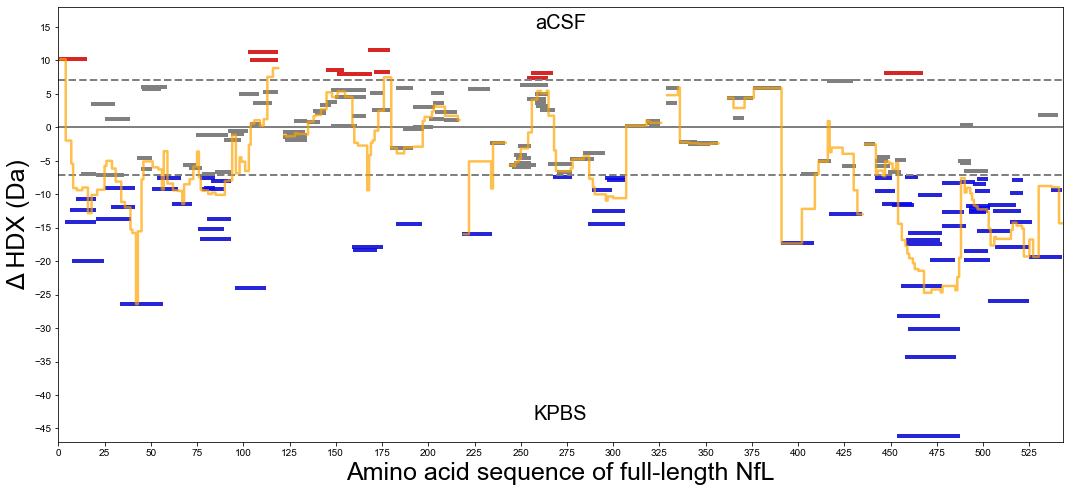

In [23]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.set(font_scale=1.5)
sns.set_style(style="white")

x = df[0].to_numpy()
all_pep = df[df.columns[1:174]].to_numpy()
exp_pep = exp[exp.columns[1:174]].to_numpy()
prot_pep = prot[prot.columns[1:174]].to_numpy()

ax.eventplot(all_pep, orientation="vertical", linewidth=4, color='grey')
ax.eventplot(exp_pep, orientation="vertical", linewidth=4, color='red', alpha=0.7)
ax.eventplot(prot_pep, orientation="vertical", linewidth=4, color = 'blue', alpha=0.7)

plt.axhline(y=0, linewidth=2, color='grey', linestyle='-')
plt.axhline(y=up_CI_99, linewidth=2, color='grey', linestyle='--')
plt.axhline(y=low_CI_99, linewidth=2, color='grey', linestyle='--')
ax.step(df[0].to_numpy(), df.iloc[:, 174].to_numpy(), linewidth=2.5, ls='-', color='orange', alpha=0.7)

ax.set(xlim=(0, 543), xticks=np.arange(0, 543),
       ylim=(-47, 18), yticks=np.arange(-47, 18))

x_locator = MultipleLocator(25)
y_locator = MultipleLocator(5)
ax.xaxis.set_major_locator(x_locator)
ax.yaxis.set_major_locator(y_locator)

# Add text annotations inside the plot
ax.text(0.5, 0.95, 'aCSF', transform=ax.transAxes,
        horizontalalignment='center', fontsize=20, color='black')
ax.text(0.5, 0.05, 'KPBS', transform=ax.transAxes,
        horizontalalignment='center', fontsize=20, color='black')

ax.set_xlabel('Amino acid sequence of full-length NfL', size=25)
ax.set_ylabel('Δ HDX (Da)', size=25)
plt.show()
fig.savefig(figure_path + "/KPBS_aCSF_woods_plot.png", dpi=600, bbox_inches='tight')

In [24]:
# Calculate SEM - standard error of the mean
df = KPBS_aCSFHSA.copy()
sem = df['Sum'].sem()

df['abs_Sum'] = df['Sum'].abs()

# Calculate which values are positive = higher than confidence intervals
df['sign_99'] = df['abs_Sum']-sem*9.925 # confidence interval 99%
sign_pep_99 = df[df['sign_99'] > 0]

sign_pep_99['Sum'].describe()

count    81.000000
mean    -11.151256
std      11.400513
min     -44.654387
25%     -16.957775
50%     -12.701084
75%      -8.675900
max      21.031515
Name: Sum, dtype: float64

In [25]:
# Set the threshold
up_CI_99 = sem*9.925
low_CI_99 = -sem*9.925

df = KPBS_aCSFHSA_woods_plot.copy()
df = df.iloc[1:]
df = df.apply(pd.to_numeric, errors='coerce')

exp = df.mask(df < up_CI_99, np.nan)
prot = df.mask(df > low_CI_99, np.nan)

In [26]:
pseudo_residue_df = KPBS_aCSFHSA_woods_plot.iloc[1:]
pseudo_residue_df = pseudo_residue_df[[174]]

pseudo_residue_df[174] = pd.to_numeric(pseudo_residue_df[174], errors='coerce')
pseudo_residue_df['sign'] = np.where((pseudo_residue_df[174] > low_CI_99) & (pseudo_residue_df[174] < up_CI_99), 
                                      0, pseudo_residue_df[174])
# Get the values
pseudo_residue_df['sign'].fillna('', inplace=True)
values_column = pseudo_residue_df.iloc[:, -1]

with open(data_path + '/define_attributes_KPBS_aCSFHSA.txt', 'w') as f:
    f.write("attribute: percentExposed\n")
    f.write("match mode: 1-to-1\n")
    f.write("recipient: residues\n")
    for index, value in enumerate(values_column, start=1):
        f.write(f"\t:{index}\t{value}\n") 

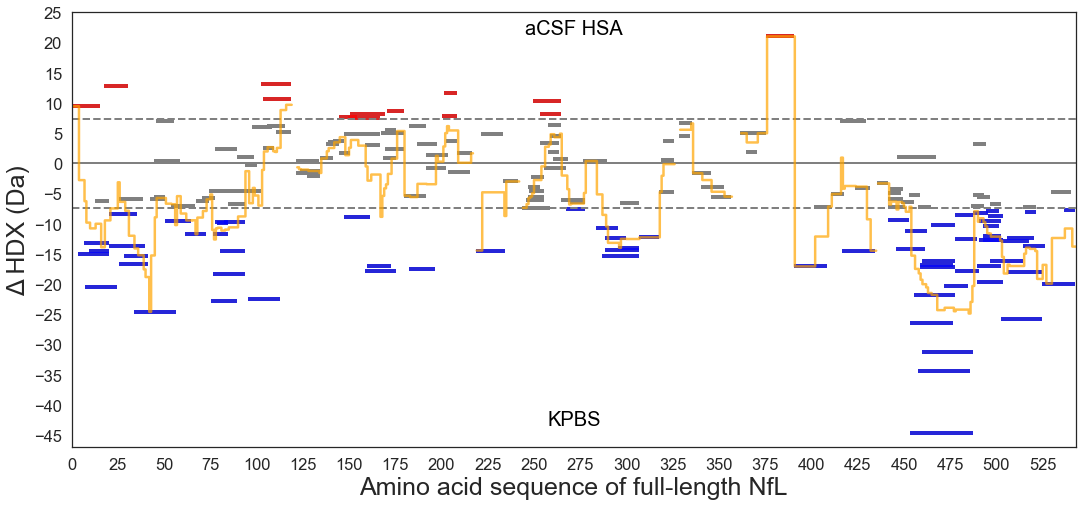

In [27]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.set(font_scale=1.5)
sns.set_style(style="white")

x = df[0].to_numpy()
all_pep = df[df.columns[1:174]].to_numpy()
exp_pep = exp[exp.columns[1:174]].to_numpy()
prot_pep = prot[prot.columns[1:174]].to_numpy()

ax.eventplot(all_pep, orientation="vertical", linewidth=4, color='grey')
ax.eventplot(exp_pep, orientation="vertical", linewidth=4, color='red', alpha=0.7)
ax.eventplot(prot_pep, orientation="vertical", linewidth=4, color = 'blue', alpha=0.7)

plt.axhline(y=0, linewidth=2, color='grey', linestyle='-')
plt.axhline(y=up_CI_99, linewidth=2, color='grey', linestyle='--')
plt.axhline(y=low_CI_99, linewidth=2, color='grey', linestyle='--')
ax.step(df[0].to_numpy(), df.iloc[:, 174].to_numpy(), linewidth=2.5, ls='-', color='orange', alpha=0.7)

ax.set(xlim=(0, 543), xticks=np.arange(0, 543),
       ylim=(-47, 25), yticks=np.arange(-47, 25))

x_locator = MultipleLocator(25)
y_locator = MultipleLocator(5)
ax.xaxis.set_major_locator(x_locator)
ax.yaxis.set_major_locator(y_locator)

# Add text annotations inside the plot
ax.text(0.5, 0.95, 'aCSF HSA', transform=ax.transAxes,
        horizontalalignment='center', fontsize=20, color='black')
ax.text(0.5, 0.05, 'KPBS', transform=ax.transAxes,
        horizontalalignment='center', fontsize=20, color='black')

ax.set_xlabel('Amino acid sequence of full-length NfL', size=25)
ax.set_ylabel('Δ HDX (Da)', size=25)
plt.show()
fig.savefig(figure_path + "/KPBS_aCSFHSA_woods_plot.png", dpi=600, bbox_inches='tight')

In [28]:
# Calculate SEM - standard error of the mean
df = aCSF_aCSFHSA.copy()
sem = df['Sum'].sem()

df['abs_Sum'] = df['Sum'].abs()
# Calculate which values are positive = higher than confidence intervals
df['sign_99'] = df['abs_Sum']-sem*9.925 # confidence interval 99%
sign_pep_99 = df[df['sign_99'] > 0]

sign_pep_99['Sum'].describe()

count    42.000000
mean     -1.636861
std       5.997066
min     -12.491602
25%      -6.232163
50%      -3.118053
75%       2.938369
max      15.175385
Name: Sum, dtype: float64

In [29]:
# Set the threshold
up_CI_99 = sem*9.925
low_CI_99 = -sem*9.925

df = aCSF_aCSFHSA_woods_plot.copy()
df = df.iloc[1:]
df = df.apply(pd.to_numeric, errors='coerce')

exp = df.mask(df < up_CI_99, np.nan)
prot = df.mask(df > low_CI_99, np.nan)

In [30]:
pseudo_residue_df = aCSF_aCSFHSA_woods_plot.iloc[1:]
pseudo_residue_df = pseudo_residue_df[[174]]

pseudo_residue_df[174] = pd.to_numeric(pseudo_residue_df[174], errors='coerce')
pseudo_residue_df['sign'] = np.where((pseudo_residue_df[174] > low_CI_99) & (pseudo_residue_df[174] < up_CI_99), 
                                      0, pseudo_residue_df[174])
# Get the values
pseudo_residue_df['sign'].fillna('', inplace=True)
values_column = pseudo_residue_df.iloc[:, -1]

with open(data_path + '/define_attributes_aCSF_aCSFHSA.txt', 'w') as f:
    f.write("attribute: percentExposed\n")
    f.write("match mode: 1-to-1\n")
    f.write("recipient: residues\n")
    for index, value in enumerate(values_column, start=1):
        f.write(f"\t:{index}\t{value}\n") 

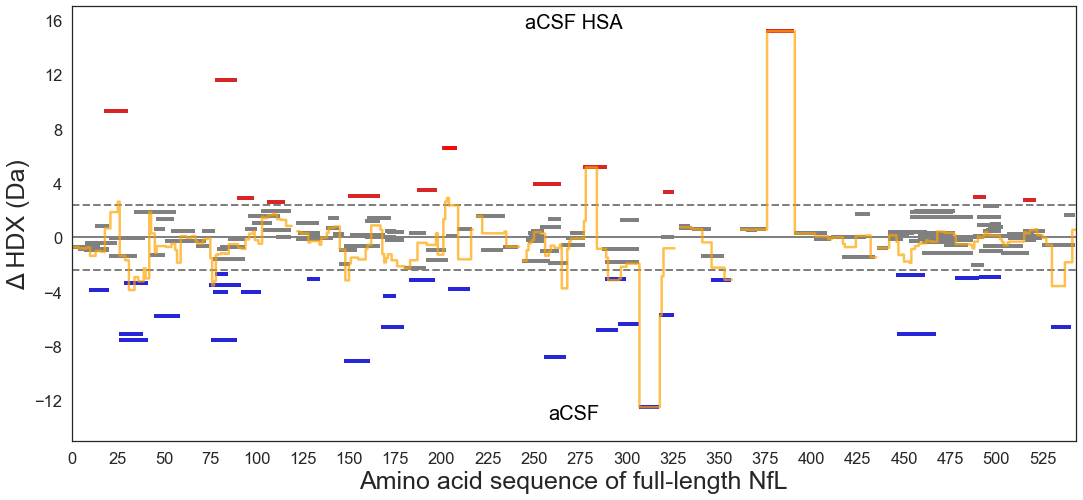

In [31]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.set(font_scale=1.5)
sns.set_style(style="white")

x = df[0].to_numpy()
all_pep = df[df.columns[1:174]].to_numpy()
exp_pep = exp[exp.columns[1:174]].to_numpy()
prot_pep = prot[prot.columns[1:174]].to_numpy()

ax.eventplot(all_pep, orientation="vertical", linewidth=4, color='grey')
ax.eventplot(exp_pep, orientation="vertical", linewidth=4, color='red', alpha=0.7)
ax.eventplot(prot_pep, orientation="vertical", linewidth=4, color = 'blue', alpha=0.7)

plt.axhline(y=0, linewidth=2, color='grey', linestyle='-')
plt.axhline(y=up_CI_99, linewidth=2, color='grey', linestyle='--')
plt.axhline(y=low_CI_99, linewidth=2, color='grey', linestyle='--')
ax.step(df[0].to_numpy(), df.iloc[:, 174].to_numpy(), linewidth=2.5, ls='-', color='orange', alpha=0.7)

ax.set(xlim=(0, 543), xticks=np.arange(0, 543),
       ylim=(-15, 17), yticks=np.arange(-15, 17))

x_locator = MultipleLocator(25)
y_locator = MultipleLocator(4)
ax.xaxis.set_major_locator(x_locator)
ax.yaxis.set_major_locator(y_locator)

# Add text annotations inside the plot
ax.text(0.5, 0.95, 'aCSF HSA', transform=ax.transAxes,
        horizontalalignment='center', fontsize=20, color='black')
ax.text(0.5, 0.05, 'aCSF', transform=ax.transAxes,
        horizontalalignment='center', fontsize=20, color='black')

ax.set_xlabel('Amino acid sequence of full-length NfL', size=25)
ax.set_ylabel('Δ HDX (Da)', size=25)
plt.show()
fig.savefig(figure_path + "/aCSF_aCSFHSA_woods_plot.png", dpi=600, bbox_inches='tight')